In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('taylor_swift_spotify.csv')

In [2]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,82,228965
1,1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,79,293048
2,2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,80,203801
3,3,Down Bad,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,4,1kbEbBdEgQdQeLXCJh28pJ,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.5600,0.541,0.366,0.000001,0.0946,-10.412,0.0748,159.707,0.168,82,261228
4,4,"So Long, London",THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,5,7wAkQFShJ27V8362MqevQr,spotify:track:7wAkQFShJ27V8362MqevQr,0.7300,0.423,0.533,0.002640,0.0816,-11.388,0.3220,160.218,0.248,80,262974


In [36]:
# checking for missing values
print("Dataset Overview: ")
print(df.info())
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

df_cleaned = df.dropna()

# converting release_date from string to datetime format if it exists
if "release_date" in df.columns:
    df_cleaned["release_date"] = pd.to_datetime(df["release_date"], errors = "coerce")
    
# dropping "Unnamed: 0" column if it exists
if "Unnamed: 0" in df_cleaned.columns:
    df_cleaned.drop(columns = ["Unnamed: 0"], inplace = True)
    
# saving the fully cleaned dataset
df_cleaned.to_csv('taylor_swift_spotify_cleaned.csv', index = False)

Dataset Overview: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              582 non-null    object        
 1   album             582 non-null    object        
 2   release_date      582 non-null    datetime64[ns]
 3   track_number      582 non-null    int64         
 4   id                582 non-null    object        
 5   uri               582 non-null    object        
 6   acousticness      582 non-null    float64       
 7   danceability      582 non-null    float64       
 8   energy            582 non-null    float64       
 9   instrumentalness  582 non-null    float64       
 10  liveness          582 non-null    float64       
 11  loudness          582 non-null    float64       
 12  speechiness       582 non-null    float64       
 13  tempo             582 non-null    float64       
 14  valence

In [26]:
df_cleaned.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,582.00000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,11.42268,0.333185,0.580804,0.565832,0.003393,0.161130,-7.661986,0.056475,122.398954,0.391000,57.857388,240011.189003
std,8.04206,0.327171,0.114553,0.191102,0.027821,0.136563,2.904653,0.070859,30.408485,0.195829,16.152520,45928.954305
min,1.00000,0.000182,0.175000,0.118000,0.000000,0.033500,-17.932000,0.023100,68.097000,0.038400,0.000000,83253.000000
25%,5.00000,0.037325,0.515000,0.418000,0.000000,0.096525,-9.400750,0.030300,96.888000,0.230000,45.000000,211823.000000
50%,10.00000,0.184500,0.593500,0.571000,0.000002,0.114500,-7.352500,0.037600,119.054500,0.374000,62.000000,235433.000000
75%,15.00000,0.660000,0.653000,0.719000,0.000058,0.161000,-5.494750,0.054800,143.937250,0.522500,70.000000,260819.500000
max,46.00000,0.971000,0.897000,0.948000,0.333000,0.931000,-1.927000,0.912000,208.918000,0.943000,93.000000,613026.000000


In [37]:
# correlation analysis but for numerical popularity 
if "popularity" in df_cleaned.columns:
    
    numeric_df = df_cleaned.select_dtypes(include = ["number"])
    
    correlation_matrix = numeric_df.corr()
    
    print("Correlation of Song Features with Popularity:\n")
    print(correlation_matrix["popularity"].sort_values(ascending = False))
else:
    print("Error: 'popularity' not found in the dataset.")


Correlation of Song Features with Popularity:

popularity          1.000000
acousticness        0.103761
instrumentalness    0.031498
danceability        0.013204
tempo              -0.018183
speechiness        -0.037221
duration_ms        -0.062182
valence            -0.095194
energy             -0.111898
liveness           -0.187878
loudness           -0.190907
track_number       -0.227873
Name: popularity, dtype: float64


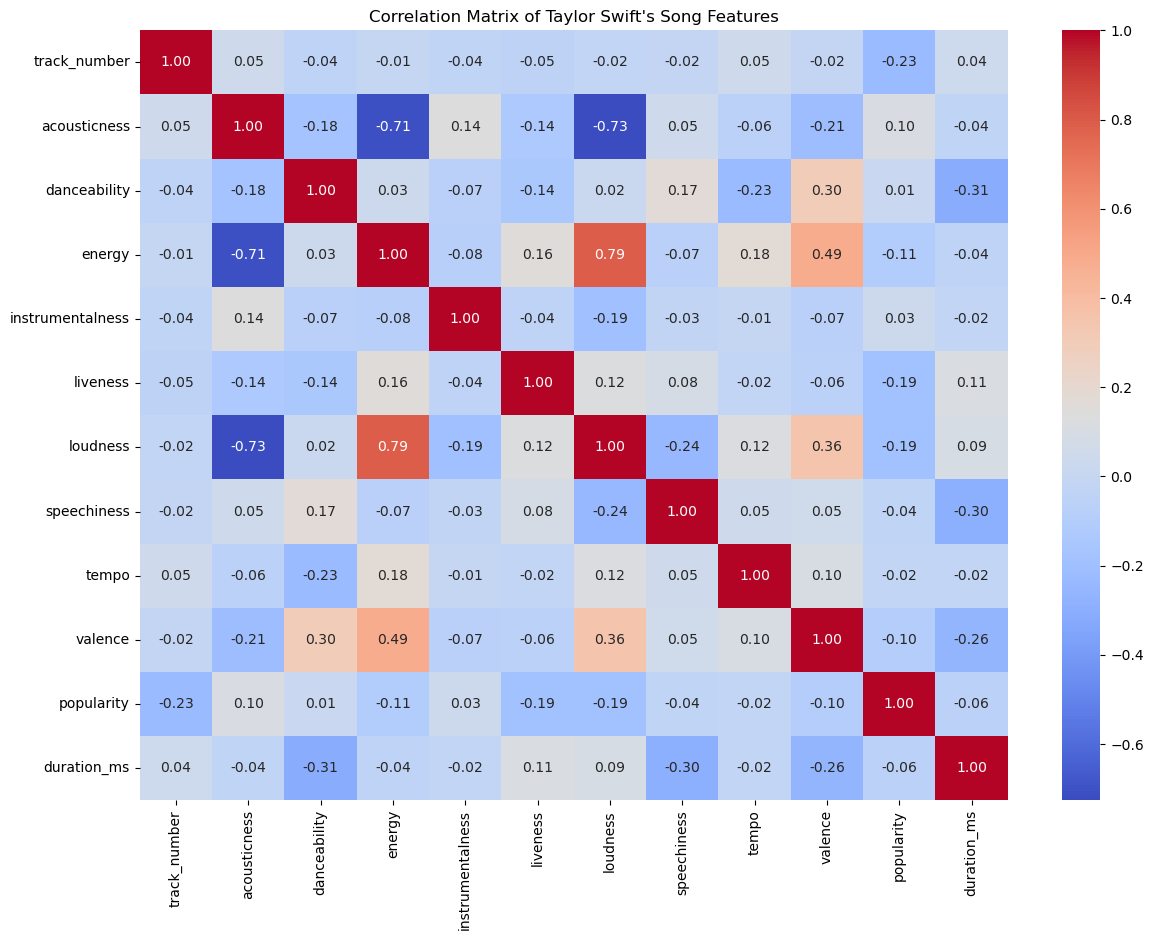

In [35]:
# plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix of Taylor Swift's Song Features")
plt.show()

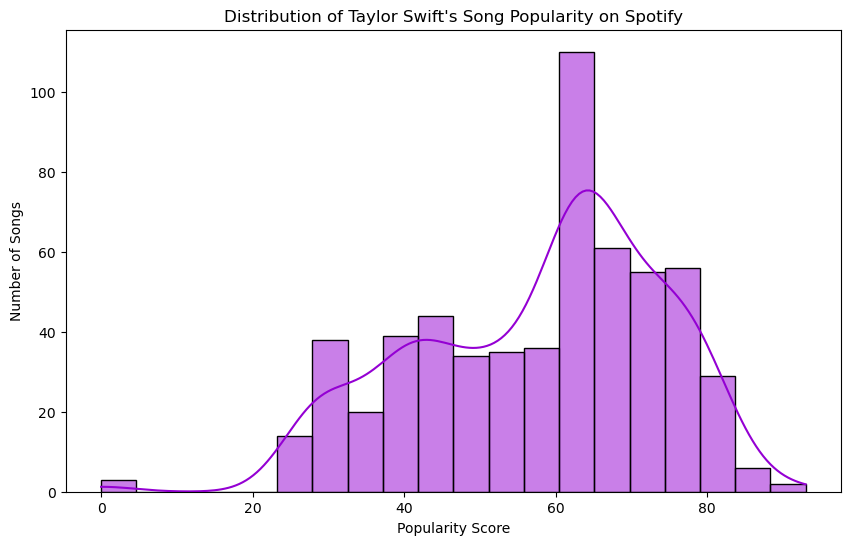

In [34]:
# distribution of popularity
plt.figure(figsize = (10, 6))
sns.histplot(df["popularity"], bins = 20, color = "darkviolet", kde = True)
plt.title("Distribution of Taylor Swift's Song Popularity on Spotify")
plt.xlabel("Popularity Score")
plt.ylabel("Number of Songs")
plt.show()

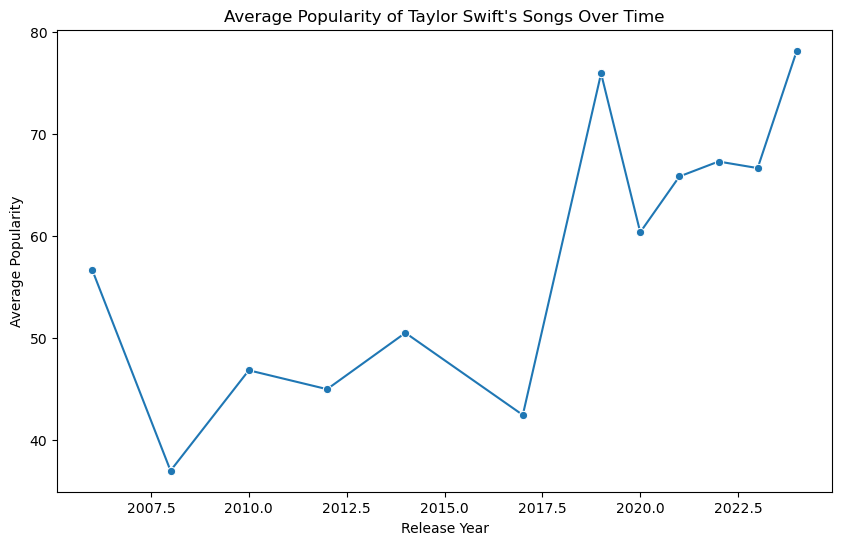

In [33]:
# time based popularity trends 
df_cleaned = df_cleaned.copy()
df_cleaned["release_year"] = df_cleaned["release_date"].dt.year

yearly_average_pop = df_cleaned.groupby("release_year")["popularity"].mean()

plt.figure(figsize = (10, 6))
sns.lineplot(x = yearly_average_pop.index, y = yearly_average_pop.values, marker = "o")
plt.title("Average Popularity of Taylor Swift's Songs Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.show()